# Libraries

In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error




import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [64]:
df = pd.read_excel('Modelo Invest e Mibel_cópia de segurança.xlsx')
df.head()

,Fecha,Preço Médio Espanha,Preço Médio Portugal,Dif Esp_PT,Market_Splitting,lEnergia total (MWh),Temperatura média (º F),Velocidade média do vento (mph),Year,PetrleoBrentltimo,...,MGM1k,Petroleo Brent,Nuclear,Primavera,Verão,Outono,Inverno,MPetróleo Brent - Último,MGás Natural (NGM1) - último,Pressão Atmosférica Média
0,2018-04-01,25.94,26.18,-0.24,Sim,5.711499,57.233333,7.785714,2018.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.64,46.92,29.085714
1,2018-04-02,28.39,28.39,0.00,Não,5.775289,58.833333,10.957143,2018.0,67.64,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.64,46.92,28.900000
2,2018-04-03,31.08,31.08,0.00,Não,5.827235,60.566667,14.642857,2018.0,68.12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.12,46.92,28.857143
3,2018-04-04,31.03,31.03,0.00,Não,5.833591,60.566667,11.428571,2018.0,68.02,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.02,47.18,28.900000
4,2018-04-05,48.13,48.13,0.00,Não,5.804138,58.700000,7.171429,2018.0,68.33,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,68.33,46.97,29.171429


# Data Wragling

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Fecha                            1096 non-null   datetime64[ns]
 1   Preço Médio Espanha              1096 non-null   float64       
 2   Preço Médio Portugal             1096 non-null   float64       
 3   Dif Esp_PT                       1096 non-null   float64       
 4   Market_Splitting                 1096 non-null   object        
 5   lEnergia total (MWh)             1096 non-null   float64       
 6   Temperatura média (º F)          1096 non-null   float64       
 7   Velocidade média do vento (mph)  1096 non-null   float64       
 8   Year                             1096 non-null   float64       
 9   PetrleoBrentltimo                775 non-null    float64       
 10  GsNaturalNGK1ltimo               790 non-null    float64    

In [66]:
df['col_datetime'] = pd.to_datetime(df['Fecha'], format='%Y-%U')

In [67]:
df.head()

,Fecha,Preço Médio Espanha,Preço Médio Portugal,Dif Esp_PT,Market_Splitting,lEnergia total (MWh),Temperatura média (º F),Velocidade média do vento (mph),Year,PetrleoBrentltimo,...,Petroleo Brent,Nuclear,Primavera,Verão,Outono,Inverno,MPetróleo Brent - Último,MGás Natural (NGM1) - último,Pressão Atmosférica Média,col_datetime
0,2018-04-01,25.94,26.18,-0.24,Sim,5.711499,57.233333,7.785714,2018.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,67.64,46.92,29.085714,2018-04-01
1,2018-04-02,28.39,28.39,0.00,Não,5.775289,58.833333,10.957143,2018.0,67.64,...,0.0,0.0,1.0,0.0,0.0,0.0,67.64,46.92,28.900000,2018-04-02
2,2018-04-03,31.08,31.08,0.00,Não,5.827235,60.566667,14.642857,2018.0,68.12,...,0.0,0.0,1.0,0.0,0.0,0.0,68.12,46.92,28.857143,2018-04-03
3,2018-04-04,31.03,31.03,0.00,Não,5.833591,60.566667,11.428571,2018.0,68.02,...,0.0,0.0,1.0,0.0,0.0,0.0,68.02,47.18,28.900000,2018-04-04
4,2018-04-05,48.13,48.13,0.00,Não,5.804138,58.700000,7.171429,2018.0,68.33,...,0.0,0.0,1.0,0.0,0.0,0.0,68.33,46.97,29.171429,2018-04-05


In [68]:
df['reference_month'] = df['Fecha'].dt.strftime('%Y-%m')

df['week_year'] = df['Fecha'].dt.strftime('%Y-%U')

df['month'] = df['Fecha'].apply(lambda time: time.month)

In [69]:
df.head()

,Fecha,Preço Médio Espanha,Preço Médio Portugal,Dif Esp_PT,Market_Splitting,lEnergia total (MWh),Temperatura média (º F),Velocidade média do vento (mph),Year,PetrleoBrentltimo,...,Verão,Outono,Inverno,MPetróleo Brent - Último,MGás Natural (NGM1) - último,Pressão Atmosférica Média,col_datetime,reference_month,week_year,month
0,2018-04-01,25.94,26.18,-0.24,Sim,5.711499,57.233333,7.785714,2018.0,NaN,...,0.0,0.0,0.0,67.64,46.92,29.085714,2018-04-01,2018-04,2018-13,4.0
1,2018-04-02,28.39,28.39,0.00,Não,5.775289,58.833333,10.957143,2018.0,67.64,...,0.0,0.0,0.0,67.64,46.92,28.900000,2018-04-02,2018-04,2018-13,4.0
2,2018-04-03,31.08,31.08,0.00,Não,5.827235,60.566667,14.642857,2018.0,68.12,...,0.0,0.0,0.0,68.12,46.92,28.857143,2018-04-03,2018-04,2018-13,4.0
3,2018-04-04,31.03,31.03,0.00,Não,5.833591,60.566667,11.428571,2018.0,68.02,...,0.0,0.0,0.0,68.02,47.18,28.900000,2018-04-04,2018-04,2018-13,4.0
4,2018-04-05,48.13,48.13,0.00,Não,5.804138,58.700000,7.171429,2018.0,68.33,...,0.0,0.0,0.0,68.33,46.97,29.171429,2018-04-05,2018-04,2018-13,4.0


- Neste ponto, seguindo a recomendação de Amjady & Hemmati (2006) que reviram alguns problemas presentes em EPF (electricity price forecasting), mais especificamente, os problemas relacionados com as técnicas de séries temporais (AR, ARIMA, GARCH). Os autores argumentam que essas técnicas só têm sucesso em ocasiões nas quais a frequência dos dados é baixa, como padrões semanais, será realizado um agrupamento semanal e agregação das variáveis que serão utilizas na modelação.

In [70]:
# saving the excel
#dados_agrup.to_excel('dados_agrup.xlsx')

In [71]:
grouped_df = df.groupby('week_year', as_index = False).\
                            agg({'Preço Médio Portugal':'mean',
                                 'lEnergia total (MWh)':'mean',
                                 'Temperatura média (º F)':'mean',
                                 'Velocidade média do vento (mph)':'mean'})

# Change the name of columns
grouped_df.columns = ['week_year','portugal_price', 'log_energy_volume','average_temperature',
                      'average_wind_speed']

# Select all float columns and round those columns
float_cols = [col for col in grouped_df.columns if grouped_df[col].dtype == 'float64']

for col in float_cols:
    grouped_df[col] = grouped_df[col].round(2)
    
## convertendo a coluna para o tipo datetime
#grouped_df['col_datetime'] = pd.to_datetime(grouped_df['week_year'], format='%Y-%U')

grouped_df.head()

,week_year,portugal_price,log_energy_volume,average_temperature,average_wind_speed
0,2018-13,34.86,5.79,58.71,10.06
1,2018-14,45.91,5.81,56.20,8.80
2,2018-15,44.86,5.78,60.33,7.27
3,2018-16,46.73,5.76,62.97,7.32
4,2018-17,41.50,5.77,60.45,9.11


In [72]:
grouped_df['date'] = pd.to_datetime(grouped_df['week_year'] + '-1', format='%Y-%U-%w')

In [73]:
grouped_df.head()

,week_year,portugal_price,log_energy_volume,average_temperature,average_wind_speed,date
0,2018-13,34.86,5.79,58.71,10.06,2018-04-02
1,2018-14,45.91,5.81,56.20,8.80,2018-04-09
2,2018-15,44.86,5.78,60.33,7.27,2018-04-16
3,2018-16,46.73,5.76,62.97,7.32,2018-04-23
4,2018-17,41.50,5.77,60.45,9.11,2018-04-30


- Aplicou-se uma transformação logarítmica na variável dependente. A transformação logarítmica é comumente aplicada em séries temporais quando os dados exibem uma variação exponencial ao longo do tempo. Essa transformação é importante porque pode ajudar a estabilizar a variância dos dados e tornar a relação entre a média e a variância mais linear. Isso pode facilitar a modelagem estatística e previsão de séries temporais.

In [74]:
## Passar a variavel alvo para logartimo e explicar a razão

grouped_df['log_portugal_price'] = np.round(np.log(grouped_df.portugal_price),2)
grouped_df.head()

,week_year,portugal_price,log_energy_volume,average_temperature,average_wind_speed,date,log_portugal_price
0,2018-13,34.86,5.79,58.71,10.06,2018-04-02,3.55
1,2018-14,45.91,5.81,56.20,8.80,2018-04-09,3.83
2,2018-15,44.86,5.78,60.33,7.27,2018-04-16,3.80
3,2018-16,46.73,5.76,62.97,7.32,2018-04-23,3.84
4,2018-17,41.50,5.77,60.45,9.11,2018-04-30,3.73


In [75]:
# definir a data de corte
corte = '2021-02-08'

# separar os dados de treino e teste
grouped_df_train = grouped_df[grouped_df.date < corte]
grouped_df_test = grouped_df[grouped_df.date >= corte]

In [76]:
df_teste = grouped_df

In [77]:
df_teste = df_teste.set_index('date')
ts_price = pd.Series(df_teste['portugal_price'])

In [78]:
ts_price

date
2018-04-02    34.86
2018-04-09    45.91
2018-04-16    44.86
2018-04-23    46.73
2018-04-30    41.50
              ...  
2021-03-01    45.62
2021-03-08    46.22
2021-03-15    29.77
2021-03-22    54.61
2021-03-29    47.94
Name: portugal_price, Length: 160, dtype: float64

In [79]:
# Calcula o índice correspondente ao primeiro 95% dos dados
train_size = int(0.95 * len(ts_price))

# Seleciona somente as primeiras linhas correspondentes ao treinamento
ts_train_price = ts_price.iloc[:train_size]

log_ts_train_price = np.round(np.log(ts_train_price),2)

In [80]:
ts_test_price = ts_price.iloc[train_size:]
ts_test_price

date
2021-02-08    24.33
2021-02-15    21.88
2021-02-22    33.38
2021-03-01    45.62
2021-03-08    46.22
2021-03-15    29.77
2021-03-22    54.61
2021-03-29    47.94
Name: portugal_price, dtype: float64

# Exploratory Data Analysis

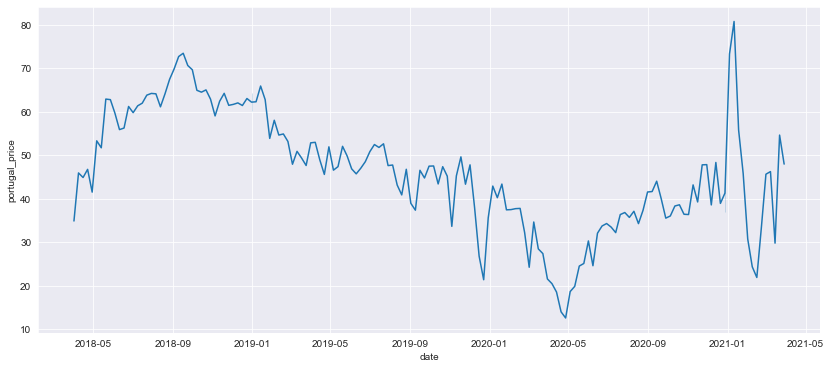

In [19]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(grouped_df['date'], grouped_df['portugal_price']);

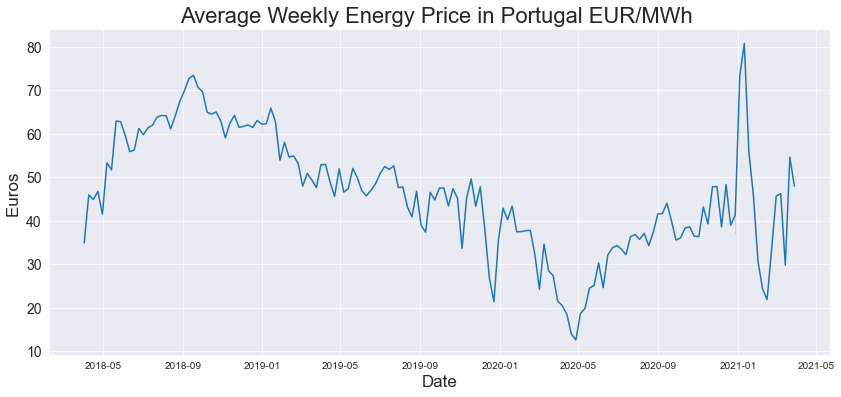

In [20]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.lineplot(grouped_df['date'], grouped_df['portugal_price'])
plt.title('Average Weekly Energy Price in Portugal EUR/MWh ', size=22)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Euros ', fontsize=17)
#plt.xticks(labels[::3], rotation='vertical')
#plt.locator_params(axis='x', nbins=len(x)/2)
plt.yticks(fontsize=14);

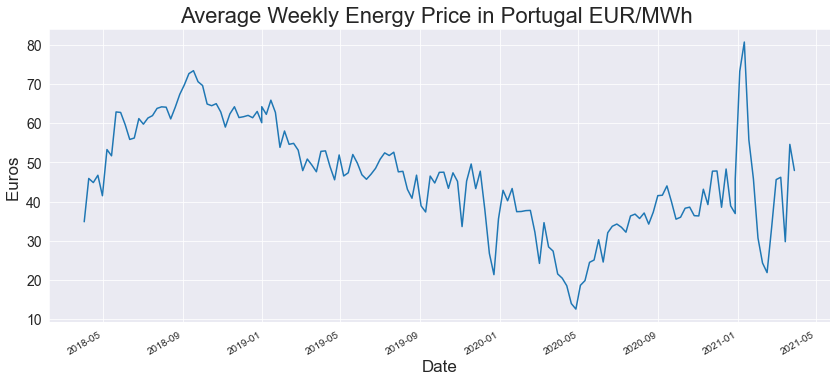

In [21]:
ts_price.plot(figsize=(14,6))
plt.title('Average Weekly Energy Price in Portugal EUR/MWh ', size=22)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Euros ', fontsize=17)
plt.yticks(fontsize=14);

In [22]:
decomposition_ts = sm.tsa.seasonal_decompose(ts_price, period = 52)


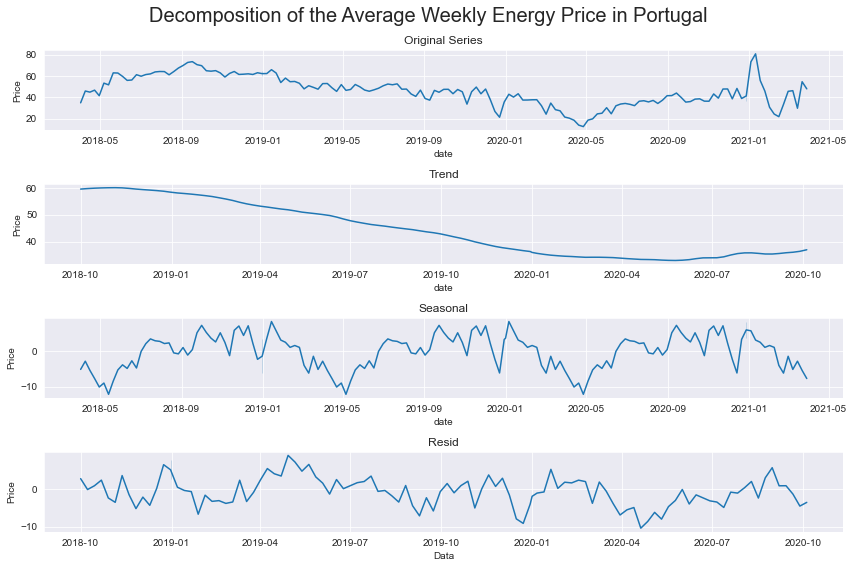

In [23]:
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Decomposition of the Average Weekly Energy Price in Portugal', fontsize=20)

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.lineplot(x=ts_price.index, y=ts_price, ax=ax1)
ax1.set_title('Original Series')
ax1.set_ylabel('Price')

sns.lineplot(x=decomposition_ts.trend.index, y=decomposition_ts.trend, ax=ax2)
ax2.set_title('Trend')
ax2.set_ylabel('Price')

sns.lineplot(x=decomposition_ts.seasonal.index, y=decomposition_ts.seasonal, ax=ax3)
ax3.set_title('Seasonal')
ax3.set_ylabel('Price')

sns.lineplot(x=decomposition_ts.resid.index, y=decomposition_ts.resid, ax=ax4)
ax4.set_title('Resid')
ax4.set_ylabel('Price')

plt.xlabel('Data')
plt.tight_layout()
plt.show()


# Gráficos de Autocorrelaçao e Estacionaridade

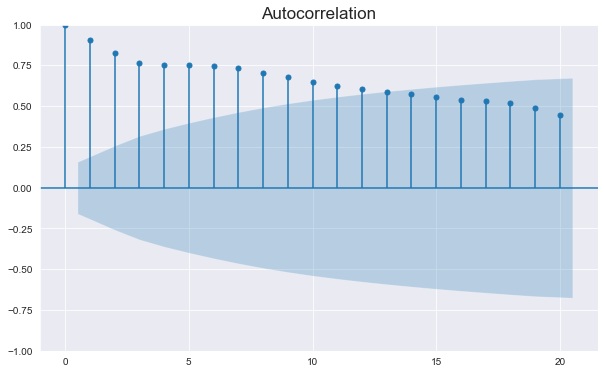

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
tsaplots.plot_acf(ts_train_price, lags=20, ax=ax)
plt.title('Autocorrelation', fontsize = 17)
plt.show()

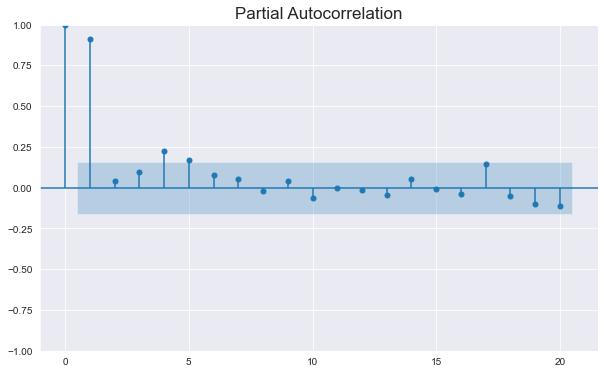

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
tsaplots.plot_pacf(ts_train_price, lags=20, ax=ax)
plt.title('Partial Autocorrelation', fontsize = 17)
plt.show()

- Os gráficos ACF E PACF sugerem que a série seja não estacionária. Para confirmar a estacionaridade da série, será aplicado o teste ADF

In [26]:
# executar o teste ADF
result = adfuller(ts_train_price)

# imprimir os resultados
print('ADF Estatística: %f' % result[0])
print('Valor-p: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] > 0.05:
    print('\nAt a significance level of 5%, we fail to reject the null hypothesis in the ADF test,\ntherefore The time series is non-stationary.')

else:
    print('\nAt a significance level of 5%, we reject the null hypothesis in the ADF test, therefore The time series is stationary.')

ADF Estatística: -1.513250
Valor-p: 0.526947
Valores Críticos:
	1%: -3.476
	5%: -2.881
	10%: -2.577

At a significance level of 5%, we fail to reject the null hypothesis in the ADF test,
therefore The time series is non-stationary.


- Com o objetivo de tornar a série estacionária, aplicou-se a diferenciação na série

In [27]:
# Aplicando a diferenciação de primeira ordem
diff_ts_price = ts_train_price.diff(periods=1)

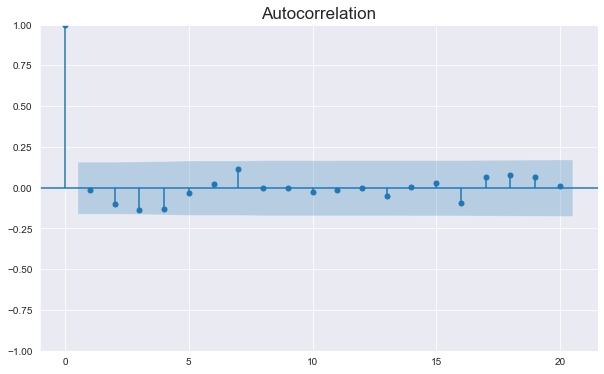

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
tsaplots.plot_acf(diff_ts_price.dropna(), lags=20, ax=ax)
plt.title('Autocorrelation', fontsize = 17)
plt.show()

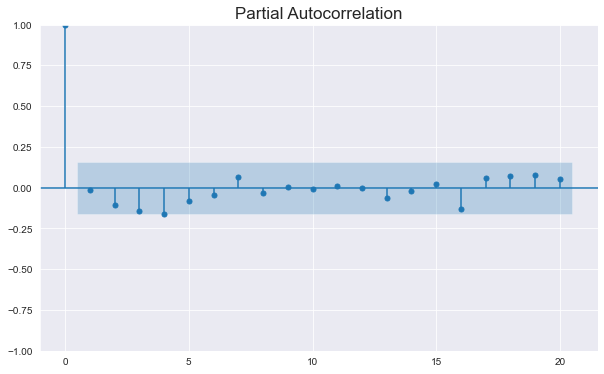

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
tsaplots.plot_pacf(diff_ts_price.dropna(), lags=20, ax=ax)
plt.title('Partial Autocorrelation', fontsize = 17)
plt.show()

In [30]:
# executar o teste ADF
result = adfuller(diff_ts_price.dropna())

# imprimir os resultados
print('ADF Estatística: %f' % result[0])
print('Valor-p: %f' % result[1])
print('Valores Críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[1] > 0.05:
    print('\nAt a significance level of 5%, we fail to reject the null hypothesis in the ADF test,\ntherefore The time series is non-stationary.')

else:
    print('\nAt a significance level of 5%, we reject the null hypothesis in the ADF test, therefore The time series is stationary.')

ADF Estatística: -7.922996
Valor-p: 0.000000
Valores Críticos:
	1%: -3.476
	5%: -2.881
	10%: -2.577

At a significance level of 5%, we reject the null hypothesis in the ADF test, therefore The time series is stationary.


# Modelling

## ARIMA

In [33]:
# Cria a grade de parâmetros para p, d e q
p = q = range(0, 3)
d = [1]
pdq = list(itertools.product(p, d, q))

# Filtra os parâmetros que têm ordem menor ou igual a 11
pdq = [params for params in pdq if sum(params) <= 11]


for params in pdq:
    try:
        # Ajusta o modelo ARIMA
        model = sm.tsa.ARIMA(ts_train_price, order=params).fit(disp=-1)
        print(model)

        # Realiza o teste de Box-Pierce
        pval = sm.stats.acorr_ljungbox(model.resid, lags=[np.log(len(model.resid))])[1]

        # Calcula o SSE
        sse = sum(model.resid**2)

        # Imprime os resultados
        print(params, 'AIC=', model.aic, ' SSE=', sse, ' p-VALUE=', pval)
    except:
        continue

In [34]:
# Cria a grade de parâmetros para p, d e q
p = d = q = range(0, 4)
d = [1]  # Define d como 1
pdq = list(itertools.product(p, d, q))

# Filtra os parâmetros que têm ordem menor ou igual a 11
pdq = [params for params in pdq if sum(params) <= 11]


for params in pdq:
    try:
        # Ajusta o modelo ARIMA
        model = sm.tsa.ARIMA(ts_train_price, order=params).fit(disp=-1)

        # Realiza o teste de Box-Pierce
        pval = sm.stats.acorr_ljungbox(model.resid, lags=[np.log(len(model.resid))])[1]

        # Calcula o SSE
        sse = sum(model.resid**2)

        # Imprime os resultados
        print(params, 'AIC=', model.aic, ' SSE=', sse, ' p-VALUE=', pval)
    except:
        continue

In [60]:
# Define as ordens para p, d e q
orders = [(p, d, q) for p in range(4) for d in range(2) for q in range(4)]

# Cria uma lista vazia para armazenar os resultados
results = []

# Loop sobre as ordens e ajusta um modelo ARIMA para cada combinação
for order in orders:
    try:
        model = sm.tsa.ARIMA(ts_train_price, order=order)
        fit = model.fit()
        results.append((order, fit.aic))
    except:
        continue

# Ordena a lista de resultados pelo AIC em ordem crescente
results.sort(key=lambda x: x[1])

In [61]:
# Crie um DataFrame com as colunas "ARIMA" e "AIC"
df_arima = pd.DataFrame(results, columns=["ARIMA", "AIC"])

df_arima

,ARIMA,AIC
0,"(2, 1, 2)",946.576314
1,"(3, 1, 3)",948.258597
2,"(2, 1, 3)",948.531793
3,"(3, 1, 2)",948.534112
4,"(3, 1, 1)",954.127472
5,"(2, 1, 1)",954.570302
6,"(0, 1, 3)",955.015559
7,"(1, 1, 2)",955.491232
8,"(1, 1, 1)",955.870839
9,"(1, 1, 3)",956.245167


- Selecionaremos o modelo ARIMA (2,1,2) pois foi o modelo com o menor AIC

In [36]:
arima_model = sm.tsa.ARIMA(log_ts_train_price, order=(2,1,2))

In [37]:
results_arima_model = arima_model.fit()

In [38]:
print(results_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:         portugal_price   No. Observations:                  152
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  85.030
Date:                Sun, 10 Sep 2023   AIC                           -160.060
Time:                        17:40:23   BIC                           -144.973
Sample:                             0   HQIC                          -153.931
                                - 152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0047      1.740      0.003      0.998      -3.407       3.416
ar.L2          0.6093      1.311      0.465      0.642      -1.960       3.179
ma.L1         -0.1370      1.762     -0.078      0.9

### Ljung-Box Test

In [39]:
results_arima_lb = sm.stats.acorr_ljungbox(results_arima_model.resid, lags=[10])
ljung_box = np.round(results_arima_lb.iloc[0, 0],2)
p_value_lb = np.round(results_arima_lb.iloc[0, 1],2)

# Imprimindo os resultados
print("Estatística de teste de Ljung-Box: ", ljung_box)
print("p-valor: ", p_value_lb)

if p_value_lb > 0.05:
    print('\nAt a significance level of 5%, we fail to reject the null hypothesis in Ljung-Box Test,\ntherefore there is no significant autocorrelation in the residuals of the model.')

else:
    print('\nAt a significance level of 5%, we reject the null hypothesis in Ljung-Box Test, therefore there is significant autocorrelation in the residuals of the model.')



Estatística de teste de Ljung-Box:  2.28
p-valor:  0.99

At a significance level of 5%, we fail to reject the null hypothesis in Ljung-Box Test,
therefore there is no significant autocorrelation in the residuals of the model.


In [40]:
results_arima_model.resid

date
2018-04-02    3.550000
2018-04-09    0.280000
2018-04-16   -0.002007
2018-04-23    0.055744
2018-04-30   -0.086764
                ...   
2021-01-04    0.489034
2021-01-11    0.179150
2021-01-18   -0.293953
2021-01-25   -0.175522
2021-02-01   -0.391045
Length: 152, dtype: float64

In [41]:
for lag in range(1, 101):
    lag_results = sm.stats.acorr_ljungbox(results_arima_model.resid, lags=[lag], boxpierce=False)
    print(f"Lag: {lag}\nLjung-Box test statistic: {lag_results.iloc[0, 0]}\nP-value: {lag_results.iloc[0, 1]}\n")

Lag: 1
Ljung-Box test statistic: 0.7857186694367713
P-value: 0.3753978535665592

Lag: 2
Ljung-Box test statistic: 0.7857254410736345
P-value: 0.675121421531204

Lag: 3
Ljung-Box test statistic: 0.7858564065915009
P-value: 0.8528469172176713

Lag: 4
Ljung-Box test statistic: 0.9078086666595826
P-value: 0.9234378758903452

Lag: 5
Ljung-Box test statistic: 1.2603251602882042
P-value: 0.9389607479881115

Lag: 6
Ljung-Box test statistic: 1.2961086186799247
P-value: 0.9718718433746458

Lag: 7
Ljung-Box test statistic: 2.1976726289928488
P-value: 0.9480943194814356

Lag: 8
Ljung-Box test statistic: 2.24124492526489
P-value: 0.9727082073870592

Lag: 9
Ljung-Box test statistic: 2.2484536751568758
P-value: 0.986901947349933

Lag: 10
Ljung-Box test statistic: 2.281150778910725
P-value: 0.99369587248094

Lag: 11
Ljung-Box test statistic: 2.31340905917366
P-value: 0.9970568556135924

Lag: 12
Ljung-Box test statistic: 2.4131705284499123
P-value: 0.9984582154319214

Lag: 13
Ljung-Box test statistic: 

### Forecasting

In [42]:
forecast_arima_model = results_arima_model.forecast(steps=8)

In [43]:
log_ts_test_price = np.round(np.log(ts_test_price),2)

In [44]:
forecast_arima_model

152    3.481322
153    3.514484
154    3.545908
155    3.566260
156    3.585502
157    3.597992
158    3.609773
159    3.617438
Name: predicted_mean, dtype: float64

In [46]:
ts_test_price

date
2021-02-08    24.33
2021-02-15    21.88
2021-02-22    33.38
2021-03-01    45.62
2021-03-08    46.22
2021-03-15    29.77
2021-03-22    54.61
2021-03-29    47.94
Name: portugal_price, dtype: float64

In [110]:
# Calcular o MAPE
mape = mean_absolute_percentage_error(log_ts_test_price, forecast_arima_model)

# Calcular o MSE
mse = mean_squared_error(log_ts_test_price, forecast_arima_model)

print(f'MAPE: {np.round(mape * 100,2)} %')
print('MSE:', np.round(mse, 2))

MAPE: 7.42 %
MSE: 0.08


## Arimax

In [81]:
grouped_df.head()

,week_year,portugal_price,log_energy_volume,average_temperature,average_wind_speed,date,log_portugal_price
0,2018-13,34.86,5.79,58.71,10.06,2018-04-02,3.55
1,2018-14,45.91,5.81,56.20,8.80,2018-04-09,3.83
2,2018-15,44.86,5.78,60.33,7.27,2018-04-16,3.80
3,2018-16,46.73,5.76,62.97,7.32,2018-04-23,3.84
4,2018-17,41.50,5.77,60.45,9.11,2018-04-30,3.73


In [84]:
reg = grouped_df[["log_energy_volume", "average_wind_speed"]]
reg.columns = ["Volume Energia", "Velocidade Vento"]

reg

,Volume Energia,Velocidade Vento
0,5.79,10.06
1,5.81,8.80
2,5.78,7.27
3,5.76,7.32
4,5.77,9.11
...,...,...
155,5.77,5.84
156,5.77,7.28
157,5.81,11.05
158,5.78,6.78


In [85]:
# Divida os DataFrames 'reg' em 'reg_treino' e 'reg_teste'
reg_treino = reg.iloc[:152, :]
reg_teste = reg.iloc[152:160, :]

In [93]:
grouped_df_teste = grouped_df.copy()
grouped_df_teste = grouped_df_teste.iloc[:152, :]

# Reindexe a série temporal para corresponder ao índice de reg_treino
grouped_df_teste['log_portugal_price'] = grouped_df_teste['log_portugal_price'].reindex(reg_treino.index)

grouped_df_teste

,week_year,portugal_price,log_energy_volume,average_temperature,average_wind_speed,date,log_portugal_price
0,2018-13,34.86,5.79,58.71,10.06,2018-04-02,3.55
1,2018-14,45.91,5.81,56.20,8.80,2018-04-09,3.83
2,2018-15,44.86,5.78,60.33,7.27,2018-04-16,3.80
3,2018-16,46.73,5.76,62.97,7.32,2018-04-23,3.84
4,2018-17,41.50,5.77,60.45,9.11,2018-04-30,3.73
...,...,...,...,...,...,...,...
147,2021-01,73.27,5.81,33.43,6.44,2021-01-04,4.29
148,2021-02,80.73,5.87,31.86,6.80,2021-01-11,4.39
149,2021-03,55.77,5.84,37.81,8.65,2021-01-18,4.02
150,2021-04,45.79,5.82,46.00,8.11,2021-01-25,3.82


In [94]:
# Crie um modelo ARIMA com regressores exógenos
model_arimax1 = sm.tsa.ARIMA(grouped_df_teste['log_portugal_price'], order=(2, 1, 3), exog=reg_treino)

# Ajuste o modelo aos dados
model_arimax1 = model_arimax1.fit()


In [96]:
model_arimax1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     log_portugal_price   No. Observations:                  152
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 115.870
Date:                Sun, 10 Sep 2023   AIC                           -215.740
Time:                        18:20:34   BIC                           -191.602
Sample:                             0   HQIC                          -205.934
                                - 152                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Volume Energia       1.1472      0.340      3.372      0.001       0.480       1.814
Velocidade Vento    -0.0435      0.004    -10.571      0.000      -0.052      -0.035
ar.L1                0.2740      0.663      0.413      0.679      -1.026       1.574
ar.L2                0.3457      0.578      0.599      0.549      -0.786       1.478
ma.L1               -0.3203      0.668     -0.479      0.632      -1.630       0.990
ma.L2               -0.3641      0.624     -0.583      0.560      -1.587       0.859
ma.L3               -0.1197      0.128     -0.937      0.349      -0.370       0.131
sigma2               0.0125      0.001     12.162      0.000       0.011       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.92
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.54   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Ljung-Box

In [113]:
results_arima_lb = sm.stats.acorr_ljungbox(model_arimax1.resid, lags=[10])
ljung_box = np.round(results_arima_lb.iloc[0, 0],2)
p_value_lb = np.round(results_arima_lb.iloc[0, 1],2)

# Imprimindo os resultados
print("Estatística de teste de Ljung-Box: ", ljung_box)
print("p-valor: ", p_value_lb)

if p_value_lb > 0.05:
    print('\nAt a significance level of 5%, we fail to reject the null hypothesis in Ljung-Box Test,\ntherefore there is no significant autocorrelation in the residuals of the model.')

else:
    print('\nAt a significance level of 5%, we reject the null hypothesis in Ljung-Box Test, therefore there is significant autocorrelation in the residuals of the model.')



Estatística de teste de Ljung-Box:  2.06
p-valor:  1.0

At a significance level of 5%, we fail to reject the null hypothesis in Ljung-Box Test,
therefore there is no significant autocorrelation in the residuals of the model.


In [98]:
for lag in range(1, 101):
    lag_results = sm.stats.acorr_ljungbox(model_arimax1.resid, lags=[lag], boxpierce=False)
    print(f"Lag: {lag}\nLjung-Box test statistic: {lag_results.iloc[0, 0]}\nP-value: {lag_results.iloc[0, 1]}\n")

Lag: 1
Ljung-Box test statistic: 0.5556466113880117
P-value: 0.4560196264250702

Lag: 2
Ljung-Box test statistic: 0.6178146777677034
P-value: 0.7342488031878343

Lag: 3
Ljung-Box test statistic: 0.6336148459016948
P-value: 0.8886957215124162

Lag: 4
Ljung-Box test statistic: 0.633631410209328
P-value: 0.9592541462133953

Lag: 5
Ljung-Box test statistic: 1.7986566253239842
P-value: 0.8762437610764301

Lag: 6
Ljung-Box test statistic: 1.798660084096003
P-value: 0.9372533362822137

Lag: 7
Ljung-Box test statistic: 1.8287816450798826
P-value: 0.9687062861584071

Lag: 8
Ljung-Box test statistic: 1.9477011558217818
P-value: 0.9825734109065976

Lag: 9
Ljung-Box test statistic: 1.985582179306444
P-value: 0.9916935554741284

Lag: 10
Ljung-Box test statistic: 2.0629835845716538
P-value: 0.9958342365799029

Lag: 11
Ljung-Box test statistic: 2.3348644904049904
P-value: 0.996930811249686

Lag: 12
Ljung-Box test statistic: 2.4910073364253473
P-value: 0.9981944553764353

Lag: 13
Ljung-Box test statis

- Não tivemos problemas de autocorrelação nos resíduos

### Forecasting

In [100]:
# Faça previsões para os próximos 8 períodos usando os regressores exógenos de teste
forecast_arimax = model_arimax1.get_forecast(steps=8, exog=reg_teste)

# Obtém as previsões e os intervalos de confiança
forecast_values = forecast_arimax.predicted_mean
forecast_ci = forecast_arimax.conf_int()

In [107]:
forecast_arimax.predicted_mean

152    3.454463
153    3.467656
154    3.583495
155    3.643659
156    3.602473
157    3.496850
158    3.659272
159    3.588524
Name: predicted_mean, dtype: float64

In [109]:
# Calcular o MAPE
mape = mean_absolute_percentage_error(log_ts_test_price, forecast_arimax.predicted_mean)

# Calcular o MSE
mse = mean_squared_error(log_ts_test_price, forecast_arimax.predicted_mean)

print(f'MAPE: {np.round(mape * 100,2)} %')
print('MSE:', np.round(mse, 2))

MAPE: 6.51 %
MSE: 0.06
